In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('../data/raw/listings_palermo.csv')

In [4]:
# CONVERSIONE DEI PREZZI IN FORMATO NUMERICO
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)

In [5]:
df['price']

0         95.0
1       1157.0
2         50.0
3         51.0
4        140.0
         ...  
5396      40.0
5397      43.0
5398      34.0
5399      47.0
5400      53.0
Name: price, Length: 5401, dtype: float64

## Distribuzione generale dei prezzi

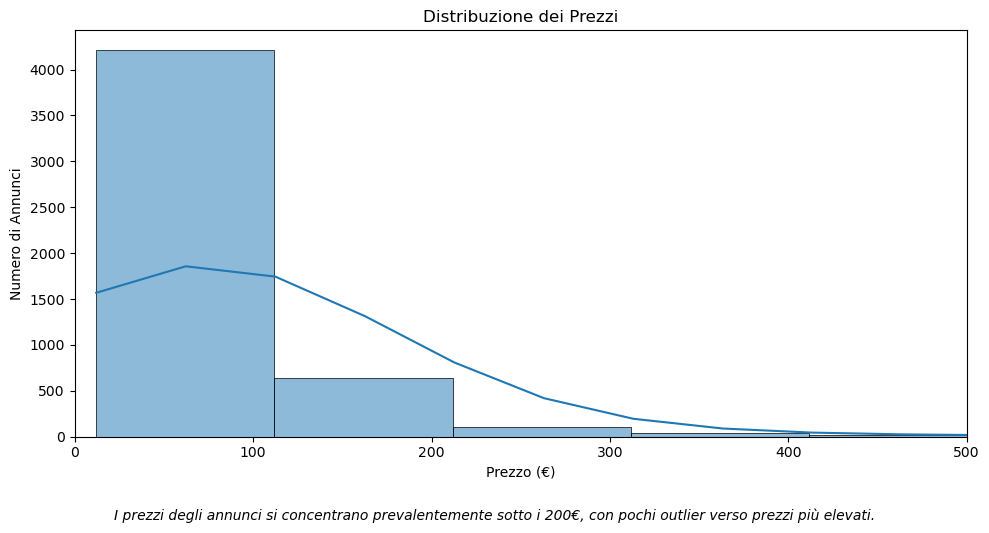

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=100, kde=True)
plt.xlim(0, 500)  
plt.title('Distribuzione dei Prezzi')
plt.xlabel('Prezzo (€)')
plt.ylabel('Numero di Annunci')
plt.figtext(0.5, -0.05, 'I prezzi degli annunci si concentrano prevalentemente sotto i 200€, con pochi outlier verso prezzi più elevati.', 
            ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.savefig('../outputs/prezzi.png', dpi=300, bbox_inches='tight')
plt.show()


## Prezzo vs. tipo di stanza o proprietà 
_Boxplot chart_


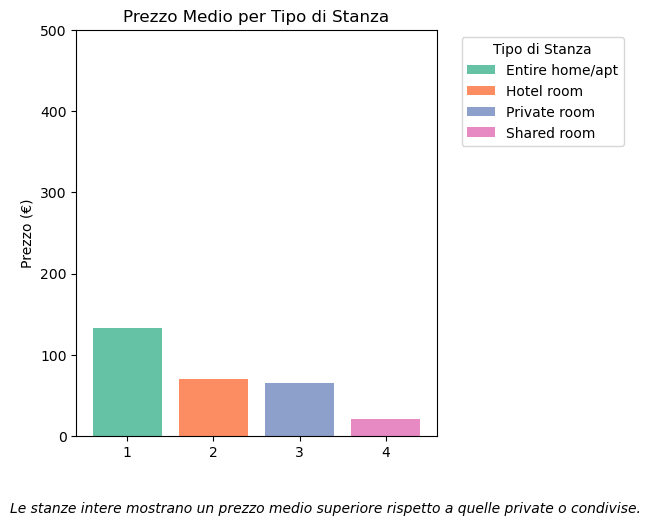

In [7]:
# Calcolo media dei prezzi per tipo di stanza
mean_prices_room = df.groupby('room_type')['price'].mean().reset_index()
mean_prices_room = mean_prices_room.sort_values(by='price', ascending=False)

# Palette
palette = sns.color_palette("Set2", len(mean_prices_room))
bars = plt.bar(
    x=range(1, len(mean_prices_room) + 1),
    height=mean_prices_room['price'],
    color=palette
)

plt.xticks(ticks=range(1, len(mean_prices_room) + 1))

# Legenda con nomi delle stanze
plt.legend(
    bars,
    mean_prices_room['room_type'],
    title="Tipo di Stanza",
    bbox_to_anchor=(1.05, 1), loc='upper left'
)

plt.ylim(0, 500)
plt.title('Prezzo Medio per Tipo di Stanza')
plt.xlabel('')
plt.ylabel('Prezzo (€)')

# Didascalia sotto
plt.figtext(
    0.5, -0.08,
    'Le stanze intere mostrano un prezzo medio superiore rispetto a quelle private o condivise.',
    ha='center', fontsize=10, style='italic'
)

# Salva e mostra
plt.tight_layout()
plt.savefig('../outputs/room_type.png', dpi=300, bbox_inches='tight')
plt.show()

NameError: name 'output_dir' is not defined

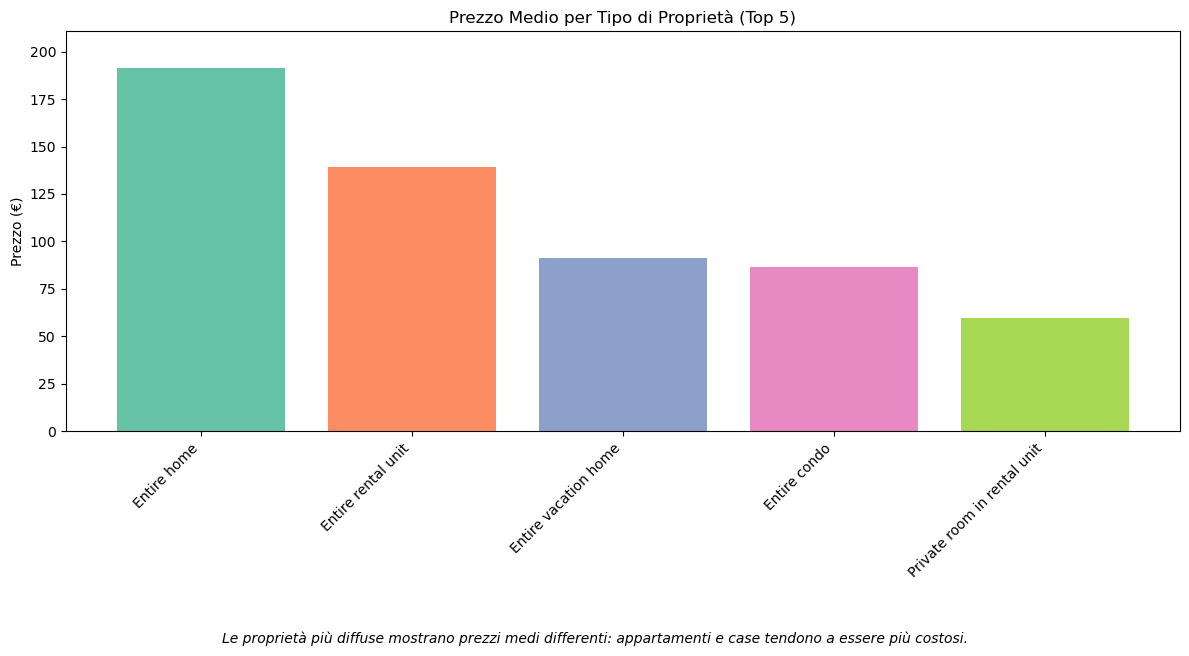

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Esempio dataframe: sostituisci con il tuo df reale
# df = pd.read_csv('tuo_file.csv')

# Calcolo media prezzi per tipo di proprietà (Top 5)
top5_props = df['property_type'].value_counts().nlargest(5).index
df_top5 = df[df['property_type'].isin(top5_props)]
mean_prices = df_top5.groupby('property_type')['price'].mean().reset_index()
mean_prices = mean_prices.sort_values(by='price', ascending=False)

# Palette colori
palette = sns.color_palette("Set2", len(mean_prices))

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(
    x=range(len(mean_prices)),
    height=mean_prices['price'],
    color=palette
)

plt.xticks(ticks=range(len(mean_prices)), labels=mean_prices['property_type'], rotation=45, ha='right')

plt.ylim(0, mean_prices['price'].max()*1.1)
plt.title('Prezzo Medio per Tipo di Proprietà (Top 5)')
plt.xlabel('')
plt.ylabel('Prezzo (€)')
plt.figtext(
    0.5, -0.08,
    'Le proprietà più diffuse mostrano prezzi medi differenti: appartamenti e case tendono a essere più costosi.',
    ha='center', fontsize=10, style='italic'
)

plt.tight_layout()
plt.savefig(f'{output_dir}/prop_type_barplot.png', dpi=300, bbox_inches='tight')
plt.show()


## Prezzo vs. numero di letti/camere 

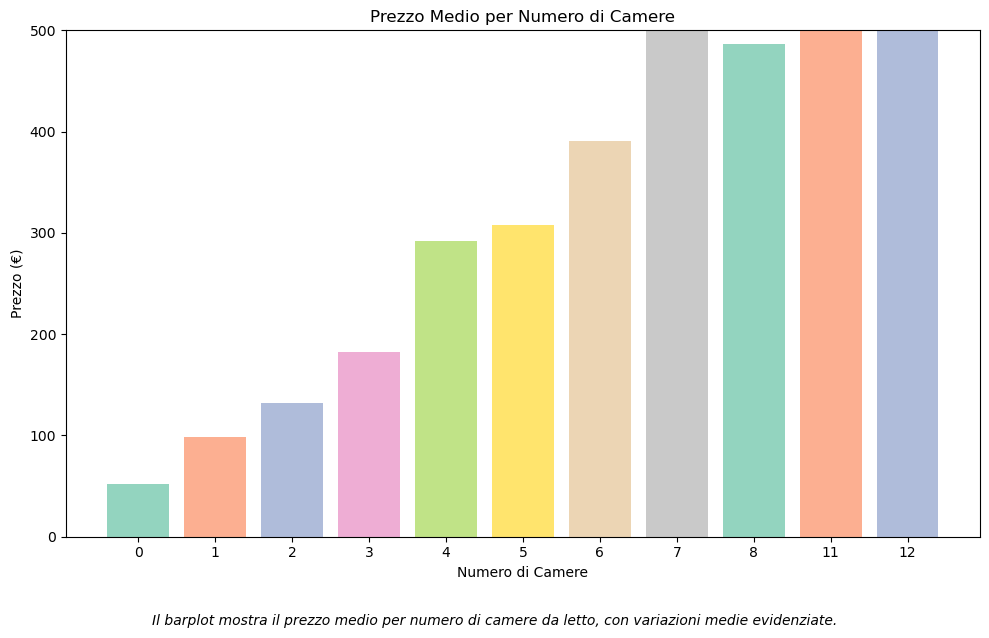

In [9]:
import os 

plt.figure(figsize=(10, 6))

# Pulizia dati: rimuoviamo NaN e valori infiniti
df_clean = df[~df['bedrooms'].isna() & np.isfinite(df['bedrooms']) & ~df['price'].isna() & np.isfinite(df['price'])].copy()

# Convertiamo bedrooms a intero per aggregazione
df_clean['bedrooms'] = df_clean['bedrooms'].astype(float).astype(int)

# Calcolo prezzo medio per numero di camere
mean_prices = df_clean.groupby('bedrooms')['price'].mean().reset_index()
mean_prices = mean_prices.sort_values('bedrooms')

# Barplot
bars = plt.bar(
    x=mean_prices['bedrooms'].astype(str),
    height=mean_prices['price'],
    alpha=0.7,
    color=sns.color_palette("Set2", len(mean_prices))
)

plt.ylim(0, 500)
plt.title('Prezzo Medio per Numero di Camere')
plt.xlabel('Numero di Camere')
plt.ylabel('Prezzo (€)')

plt.figtext(
    0.5, -0.05,
    'Il barplot mostra il prezzo medio per numero di camere da letto, con variazioni medie evidenziate.',
    ha='center', fontsize=10, style='italic'
)

plt.tight_layout()

plt.savefig('../outputs/bedrooms.png', dpi=300, bbox_inches='tight')
plt.show()